#### Clean data and simulate a large dataset

In [ ]:
import pandas as pd

# Load the original 7K dataset
df = pd.read_csv("../data/telco_7k.csv")

# Basic structure
df.shape, df.columns.tolist()

((7043, 21),
 ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn'])

In [3]:
df.dropna(subset=["Churn"], inplace=True)
df.shape

(7043, 21)

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Tenure Buckets
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 24, 48, 72],
    labels=["0–6m (High Risk)", "6–24m", "24–48m", "48–72m"],
)

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–6m (High Risk)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,24–48m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–6m (High Risk)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24–48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–6m (High Risk)


In [7]:
 # Binary Flags
df["is_new_customer"] = (df["tenure"] < 6).astype(int)
df["is_loyal_customer"] = (df["tenure"] > 60).astype(int)

df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,is_new_customer,is_loyal_customer
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–6m (High Risk),1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,24–48m,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–6m (High Risk),1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24–48m,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–6m (High Risk),1,0


In [8]:
# Interaction Features
df["tenure_monthly_ratio"] = df["tenure"] / df["MonthlyCharges"]
df["high_charge_short_tenure"] = (
    (df["MonthlyCharges"] > 80) & (df["tenure"] < 6)
).astype(int)

In [9]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,is_new_customer,is_loyal_customer,tenure_monthly_ratio,high_charge_short_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0–6m (High Risk),1,0,0.033501,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.5,No,24–48m,0,0,0.597015,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0–6m (High Risk),1,0,0.037140,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,24–48m,0,0,1.063830,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0–6m (High Risk),1,0,0.028289,0


In [10]:
# Save preprocessed data
df.to_csv("../data/telco_cleaned_7k.csv", index=False)
print(f"Preprocessed data saved to ../data/telco_cleaned_7k.csv")

Preprocessed data saved to ../data/telco_cleaned_7k.csv


In [12]:
import numpy as np
df_cleaned = pd.read_csv("../data/telco_cleaned_7k.csv")

# Basic structure
df_cleaned.shape, df_cleaned.columns.tolist()

((7043, 26),
 ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn',
  'tenure_group',
  'is_new_customer',
  'is_loyal_customer',
  'tenure_monthly_ratio',
  'high_charge_short_tenure'])

In [14]:
df_large = pd.concat([df] * 150, ignore_index=True)

In [15]:
df_large.shape, df_large.columns.tolist()

((1056450, 26),
 ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn',
  'tenure_group',
  'is_new_customer',
  'is_loyal_customer',
  'tenure_monthly_ratio',
  'high_charge_short_tenure'])

In [16]:
# Optionally add slight noise to numeric fields (like MonthlyCharges)
if "MonthlyCharges" in df_large.columns:
    noise = np.random.normal(loc=0.0, scale=2.0, size=len(df_large))
    df_large["MonthlyCharges"] = df_large["MonthlyCharges"] + noise
    df_large["MonthlyCharges"] = df_large["MonthlyCharges"].clip(lower=0)

# Shuffle the rows
df_large = df_large.sample(frac=1).reset_index(drop=True)



### Histogram for monthly charges by churn on large dataset

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

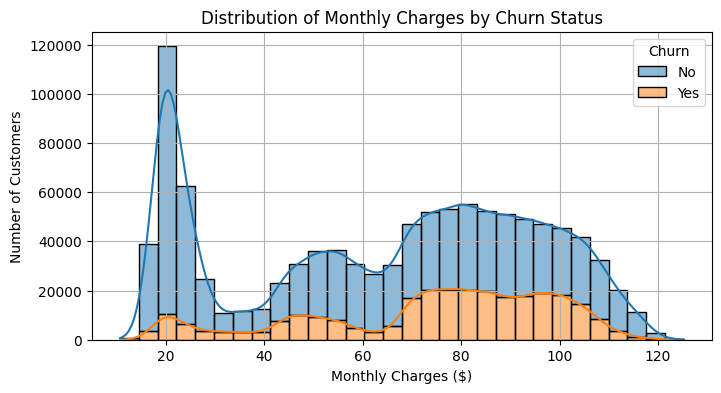

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_large, x='MonthlyCharges', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

### Histogram for tenure by churn for large dataset

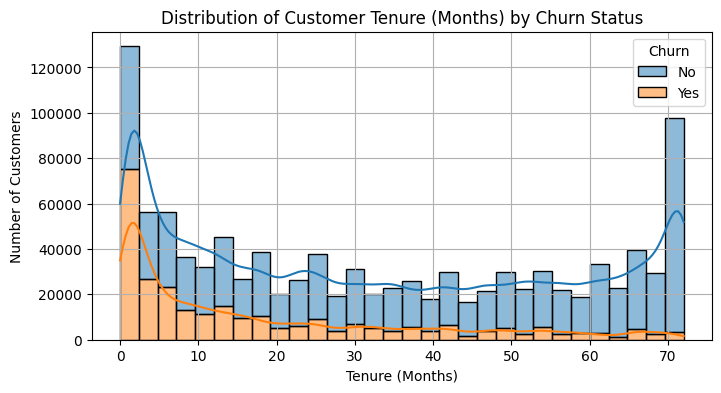

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_large, x='tenure', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title("Distribution of Customer Tenure (Months) by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

In [20]:
# Save the simulated dataset
df_large.to_csv("../data/telco_cleaned_1M.csv", index=False)
print(f"Simulated dataset with {len(df_large):,} rows saved to ../data/telco_cleaned_1M.csv")

Simulated dataset with 1,056,450 rows saved to ../data/telco_cleaned_1M.csv
